## import warnings and relevant libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Reading dataset:
lead_data = pd.read_csv('Leads.csv')

In [6]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# shape of dataset
lead_data.shape

(9240, 37)

In [8]:
# Checking all the non-null count and variable datatype
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning and Preparation

In [9]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [11]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [13]:
# dropping the columns with missing values >= 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality',
                                  'Lead Profile','City','Asymmetrique Activity Index',
                                  'Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [14]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

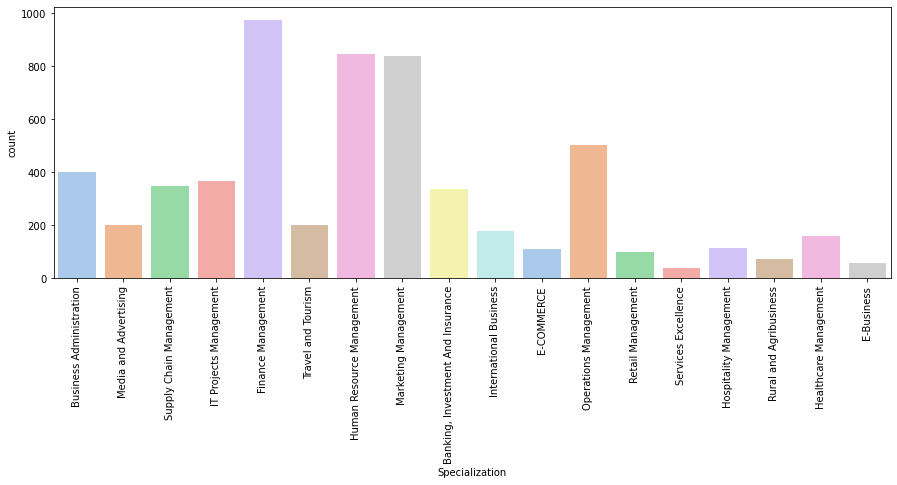

In [15]:
# Feature : Specialization (37% missing)

plt.figure(figsize=(15,5))
sns.countplot(lead_data['Specialization'], palette='pastel')
plt.xticks(rotation=90)
plt.show()

In [16]:
# 37% of the missing values could belong to students or freshers with no current specialization.
# Maybe this was the reason why it was left as either blank or select.
# We will create a column 'Others' for this reason as this feature is too important to drop.

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

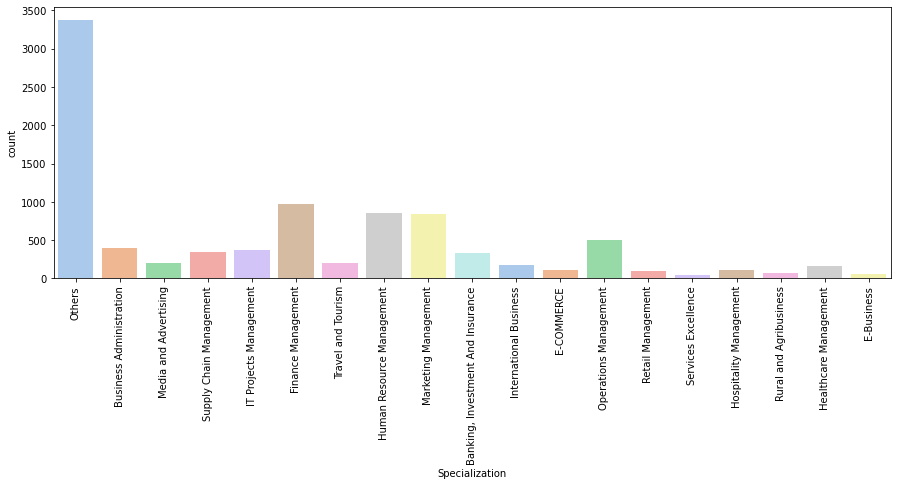

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(lead_data['Specialization'], palette='pastel')
plt.xticks(rotation=90)
plt.show()

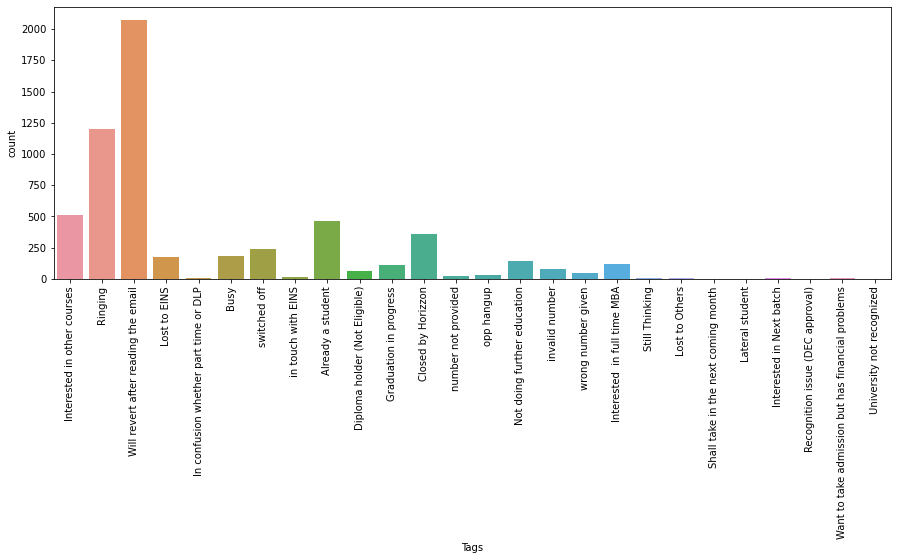

In [18]:
# Feature : Tags (36% missing)

plt.figure(figsize=(15,5))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [19]:
# Fill missing value with 'Will revert after reading the email' (maximum selection)

lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

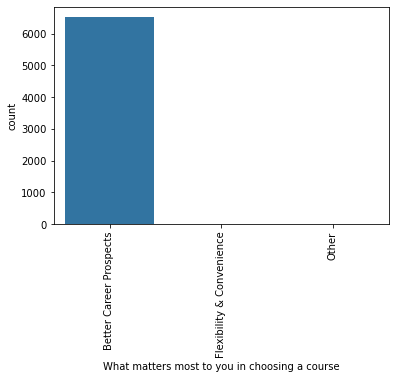

In [20]:
# Feature : What matters most to you in choosing a course' (29% missing)

sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [21]:
# Almost all the values are 'Better Career Prospects'. We can drop this column.

lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

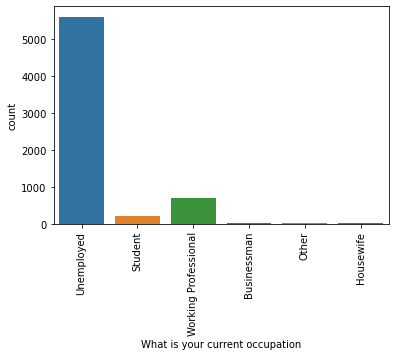

In [22]:
# Feature : What is your current occupation (29% missing)

sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [23]:
# Filling missing values with 'Unemployed' (maximum selection)
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

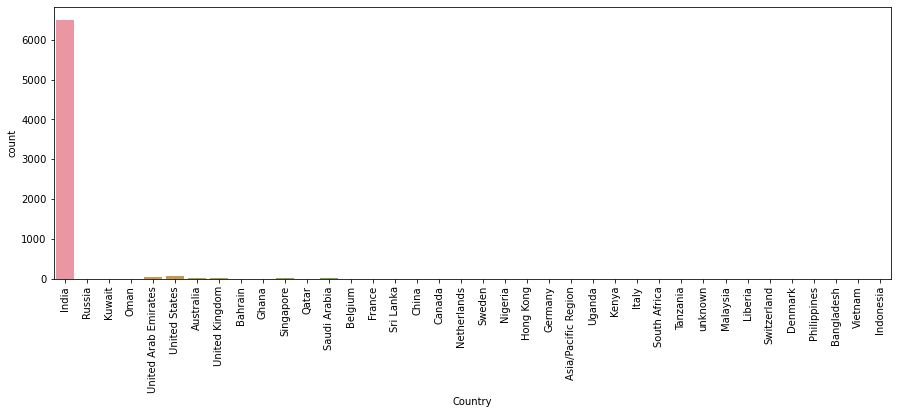

In [24]:
# Feature : Country (27% missing)

plt.figure(figsize=(15,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# Filling missing values with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

In [26]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# Dropping rows for columns with less than 2% missing data

lead_data.dropna(inplace = True)

In [28]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [29]:
# No more missing values

In [30]:
# Current Shape
lead_data.shape

(9074, 28)

In [31]:
# Remaining data percentage
print(round((9074/9240)*100,2),'%')

98.2 %


In [32]:
# Checking for duplicates
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## EDA (Exploratory Data Analysis): 
### Univariate, Bivariate and Multivariate Analysis

In [34]:
# Feature : Converted (Target Variable)

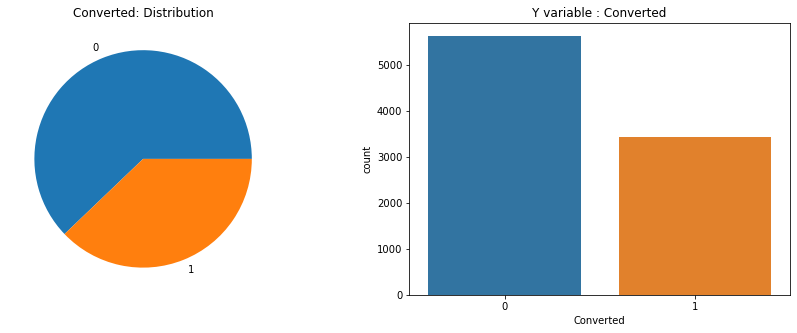

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
lead_data.Converted.value_counts(normalize=True).plot(kind='pie')
plt.title('Converted: Distribution')
plt.ylabel('')  # Hide the y-axis label

plt.subplot(1,2,2)
sns.countplot(lead_data['Converted'])
plt.title('Y variable : Converted')

plt.show()

In [36]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
round(Converted,2)

37.86

In [37]:
# Lead Conversion Rate: Approximately 38%

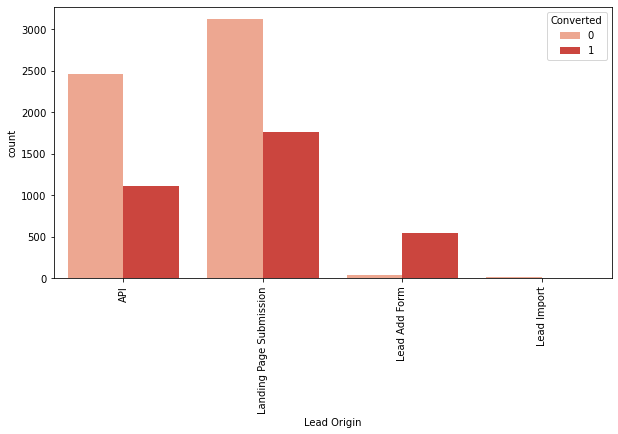

In [38]:
# Feature : Lead Origin

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data, palette='Reds')
plt.xticks(rotation = 90)
plt.show()

In [39]:
# Landing Page Submission and API are the highest 2 categories in terms of quantity.
# Leads from 'Lead Add Form' have the least amount of rejection and the most amount of conversion.

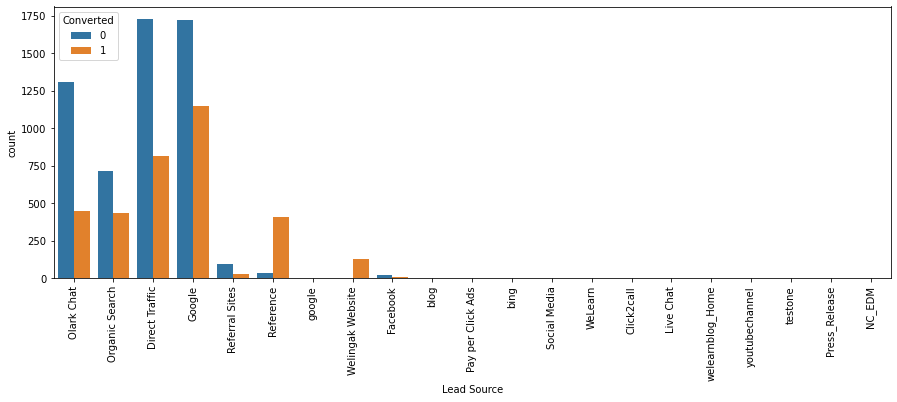

In [40]:
# Feature : Lead Source

plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [41]:
# replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [42]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 
                                    'NC_EDM', 'Pay per Click Ads', 'Press_Release', 
                                    'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 
                                    'welearnblog_Home', 'youtubechannel'], 'Others')

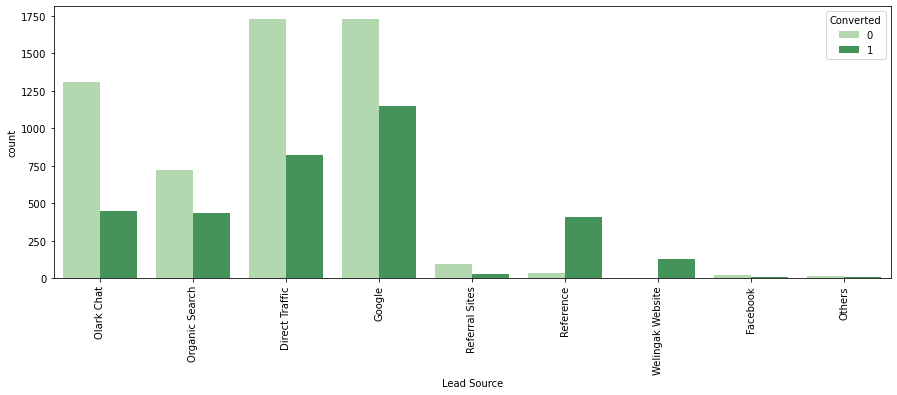

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Greens')
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Google and Direct Traffic produces the most number of leads but the conversion rate is low.
# Reference and Welingak Website have high conversion rates.

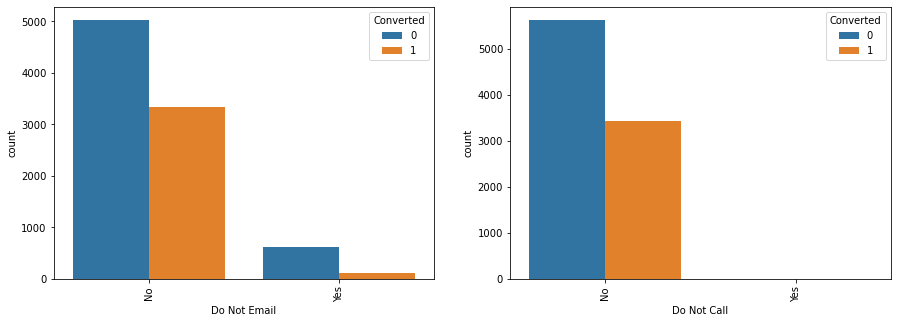

In [45]:
# Features : 'Do Not Email' and 'Do Not Call'

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

plt.show()

In [46]:
# Numerical Variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

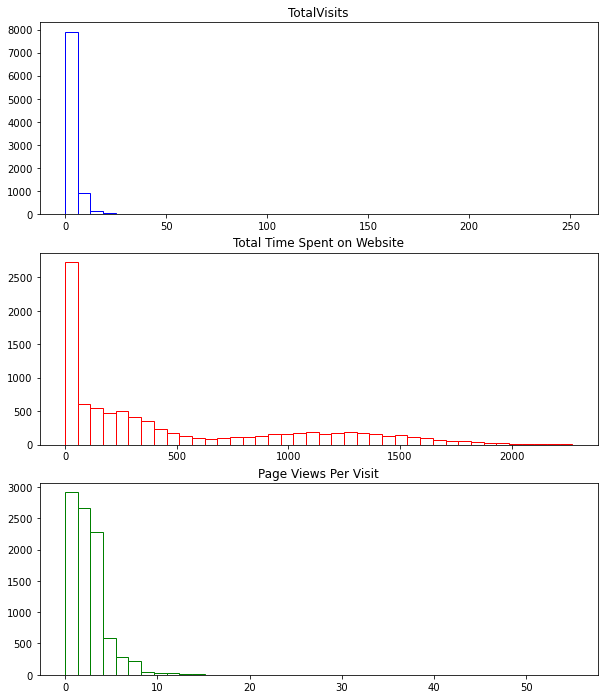

In [47]:
# Features : TotalVisits, Total Time Spent on Website, Page Views Per Visit

plt.figure(figsize=(10,12))
plt.style.use("seaborn-deep")

plt.subplot(3,1,1)
plt.hist(lead_data['TotalVisits'], bins=40, color='w', edgecolor='b')
plt.title('TotalVisits')

plt.subplot(3,1,2)
plt.hist(lead_data['Total Time Spent on Website'], bins=40, color='w', edgecolor='r')
plt.title('Total Time Spent on Website')

plt.subplot(3,1,3)
plt.hist(lead_data['Page Views Per Visit'], bins=40, color='w', edgecolor='g')
plt.title('Page Views Per Visit')

plt.show()

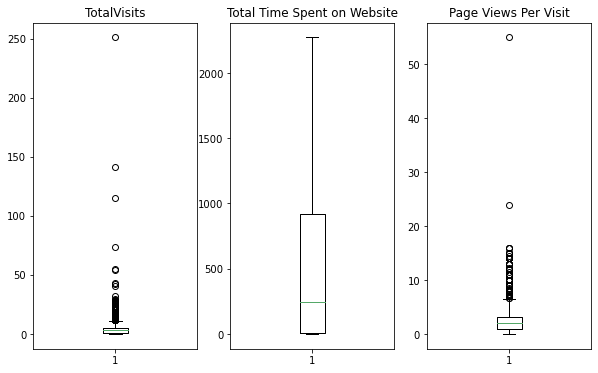

In [48]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.boxplot(lead_data['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1,3,2)
plt.boxplot(lead_data['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
plt.boxplot(lead_data['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

In [49]:
# 'TotalVisits' and 'Page Views Per Visit' have outliers. We can cap them to 95 percentile.
# 'Total Time Spent on Website' doesn't show any outliers. 
# Leads who spend more time on the website have higher possibility of converting.

In [50]:
# Feature : TotalVisits

percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

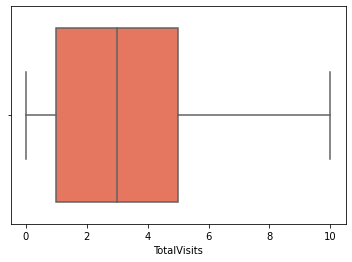

In [51]:
sns.boxplot(lead_data['TotalVisits'], palette='Reds')
plt.show()

In [52]:
# Feature : Page Views Per Visit

percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

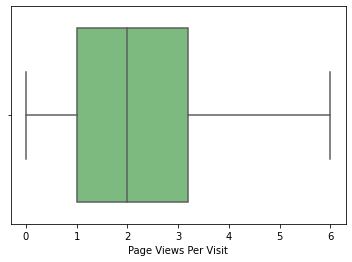

In [53]:
sns.boxplot(lead_data['Page Views Per Visit'], palette='Greens')
plt.show()

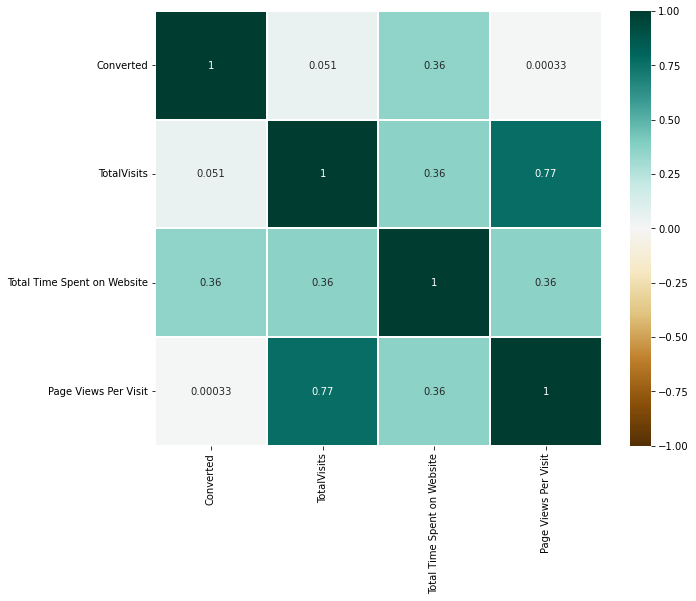

In [54]:
# Checking for Correlation

plt.figure(figsize=(10,8))
sns.heatmap(lead_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), 
            annot=True, cmap='BrBG', robust=True, linewidths=0.1, vmin=-1)

plt.show()

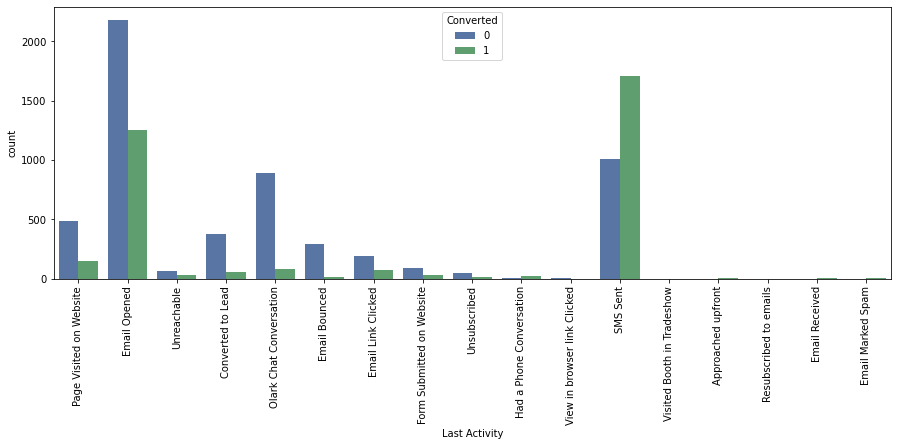

In [55]:
# Feature : Last Activity

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [56]:
# We can club the Last Activity with less data to "Other_Activity".
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 
                            'View in browser link Clicked', 'Visited Booth in Tradeshow', 
                            'Approached upfront','Resubscribed to emails','Email Received', 
                            'Email Marked Spam'], 'Other_Activity')

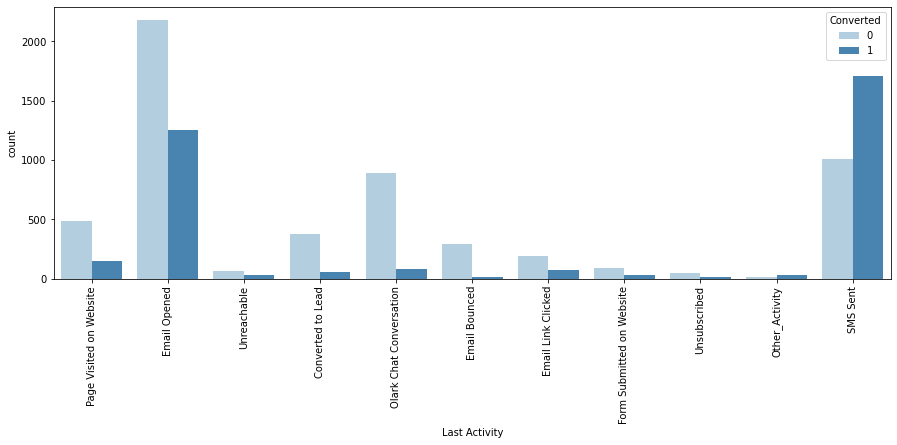

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data, palette='Blues')
plt.xticks(rotation = 90)
plt.show()

In [58]:
# 'Email Opened' have the highest leads but 'SMS Sent' have the highest conversion rate.

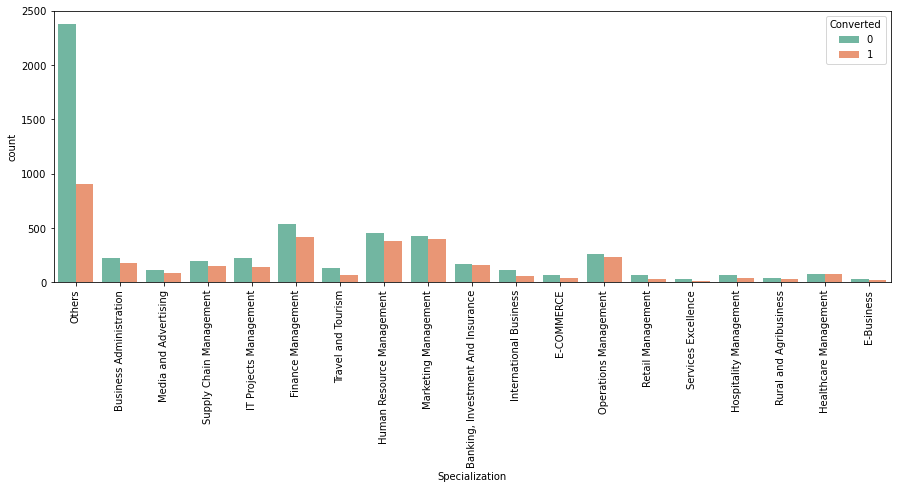

In [59]:
# Feature : Specialization

plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data, palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [60]:
# Leads who do not mention thier specialization have a lower chance of conversion.

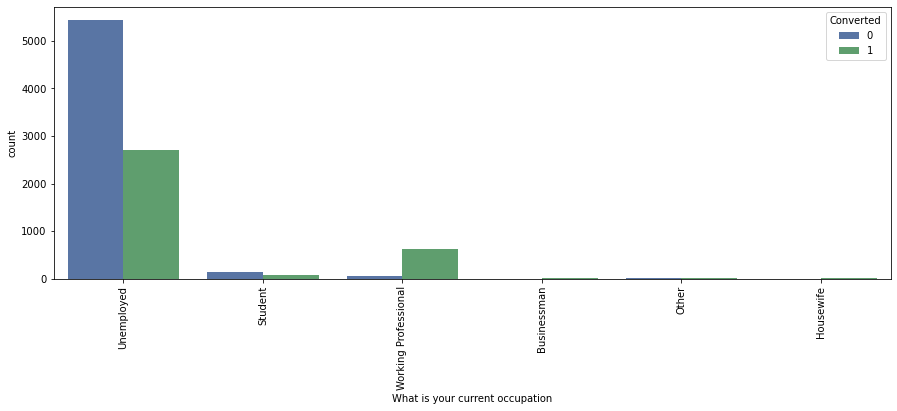

In [61]:
# Feature : What is your current occupation

plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [62]:
# Unemployed leads are the highest in terms of quantity of lead.
# Conversion rate highest for Working Professional.

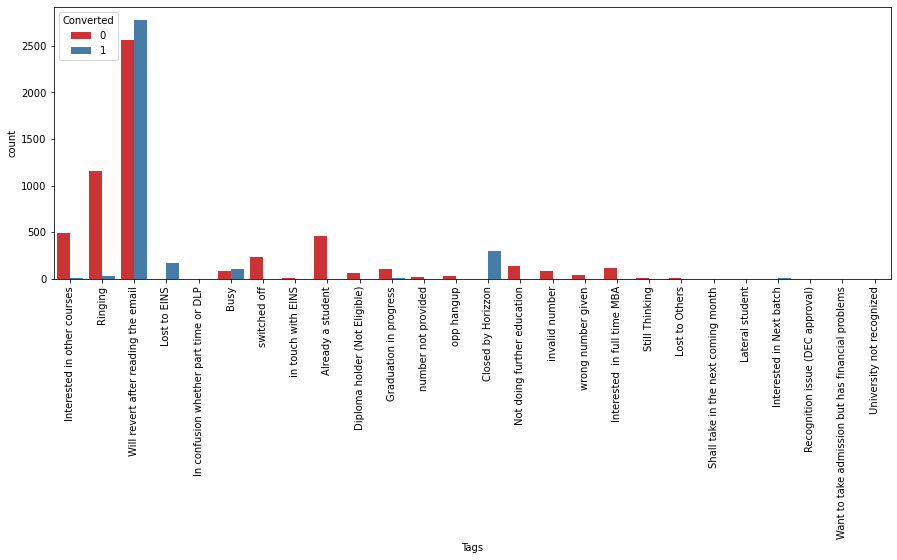

In [63]:
# Feature : Tags

plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [64]:
# This is a feature generated by the sales team for their analysis.
# We will remove this feature.

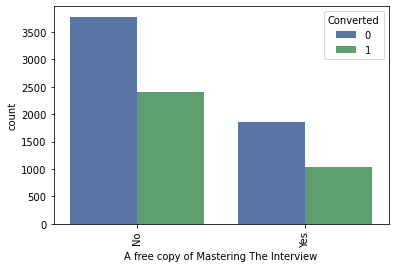

In [65]:
# Feature : A free copy of Mastering The Interview

sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [66]:
# Most entries are 'No'. No Inference can be drawn with this parameter.

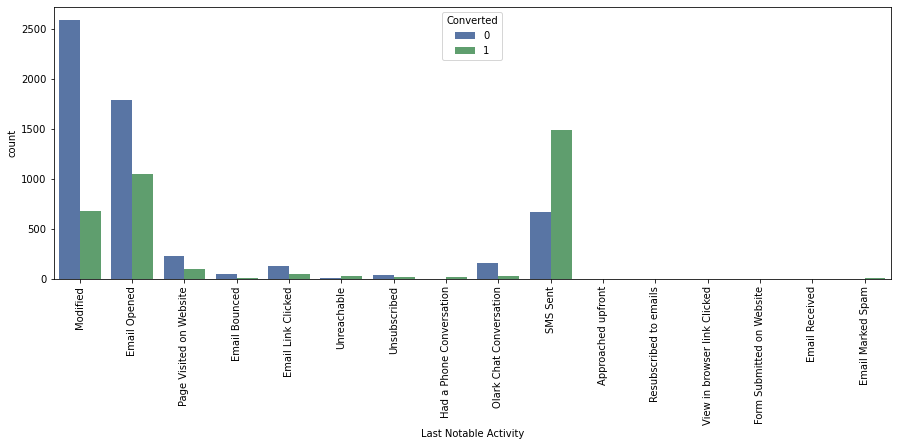

In [67]:
# Feature : Last Notable Activity

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

In [68]:
lead_data.shape

(9074, 28)

In [69]:
lead_data.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified


In [70]:
# checking for columns with unique values
lead_data.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                    9
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   11
Total Time Spent on Website                 1717
Page Views Per Visit                          91
Last Activity                                 11
Country                                       38
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

In [71]:
# dropping columns with only 1 value (won't help in analysis)
lead_data = lead_data.loc[:, lead_data.nunique()>1]

In [72]:
lead_data.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Last Activity                               11
Country                                     38
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        26
A free copy o

In [73]:
lead_data.shape

(9074, 23)

In [74]:
# check the value_count for all columns

for cols in lead_data:
    print(lead_data[cols].astype('category').value_counts())
    print('*******************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
*******************************************
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64
*******************************************
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
*******************************************
Google              28

In [75]:
# Features that are not required for further analysis.

lead_data = lead_data.drop(['Lead Number','Tags','Country','Search',
                            'Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations',
                            'A free copy of Mastering The Interview'],1)

In [76]:
lead_data.shape

(9074, 13)

In [77]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Last Notable Activit

In [78]:
# Converting binary variables:
# (Yes/No) -> (0/1)

vars =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead_data[vars] = lead_data[vars].apply(binary_map)

In [79]:
# Dummy Variables for Categorical Features

dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 
            'Specialization','What is your current occupation',
            'Last Notable Activity']], drop_first=True)

In [80]:
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head(1)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# Drop the features for which dummies were created.
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 
            'Specialization','What is your current occupation',
            'Last Notable Activity'], axis = 1)

In [83]:
lead_data.shape

(9074, 66)

In [84]:
lead_data.head(1)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## TRAIN-TEST SPLIT

In [86]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head(1)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
# Putting target variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
# SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
# Feature Selection using RFE

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Creating a LogisticRegression object
logreg = LogisticRegression()

In [91]:
# Import RFE
from sklearn.feature_selection import RFE

# Selecting 20 variables via RFE
rfe = RFE(estimator=logreg,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False])

In [93]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 

In [94]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## MODEL BUILDING

In [96]:
import statsmodels.api as sm

In [97]:
# 1st Model

In [98]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 18 Feb 2025   Deviance:                       5180.6
Time:                        13:11:07   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

In [99]:
# P-value of 'What is your current occupation_Housewife' is 0.999
# Drop it.
col1 = cols.drop('What is your current occupation_Housewife')

In [100]:
# 2nd Model

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 18 Feb 2025   Deviance:                       5184.5
Time:                        13:11:09   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

In [102]:
# P-value of 'Last Notable Activity_Had a Phone Conversation' is 0.247
# Drop it.
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [103]:
# 3rd Model

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 18 Feb 2025   Deviance:                       5186.1
Time:                        13:11:11   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [105]:
# P-value of 'What is your current occupation_Student' is 0.098
# Drop it.
col1 = col1.drop('What is your current occupation_Student')

In [106]:
# 4th Model

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 18 Feb 2025   Deviance:                       5189.0
Time:                        13:11:13   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [108]:
# P-value of Lead Origin_Lead Add Form is 0.081
# Drop it.
col1 = col1.drop('Lead Origin_Lead Add Form')

In [109]:
# 5th Model

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 18 Feb 2025   Deviance:                       5192.3
Time:                        13:11:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

In [111]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


In [113]:
# Dropping 'What is your current occupation_Unemployed'. VIF: 9.72
col1 = col1.drop('What is your current occupation_Unemployed')

In [114]:
# 6th Model

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Tue, 18 Feb 2025   Deviance:                       5200.0
Time:                        13:11:18   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.17
4,Lead Source_Olark Chat,2.04
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.30
5,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


In [117]:
# Dropping Lead Origin_Lead Import. P-value is 0.072
col1 = col1.drop('Lead Origin_Lead Import')

In [118]:
# 7th Model

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 18 Feb 2025   Deviance:                       5203.0
Time:                        13:11:22   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [121]:
# Dropping Last Activity_Unsubscribed. P-value: 0.004
col1 = col1.drop('Last Activity_Unsubscribed')

In [122]:
# 8th Model

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 18 Feb 2025   Deviance:                       5210.2
Time:                        13:11:25   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [125]:
# Dropping 'Last Notable Activity_Unreachable'.
col1 = col1.drop('Last Notable Activity_Unreachable')

In [126]:
# 9th Model

In [127]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 18 Feb 2025   Deviance:                       5221.0
Time:                        13:11:28   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


In [129]:
# Selecting Model 9 as the final model.

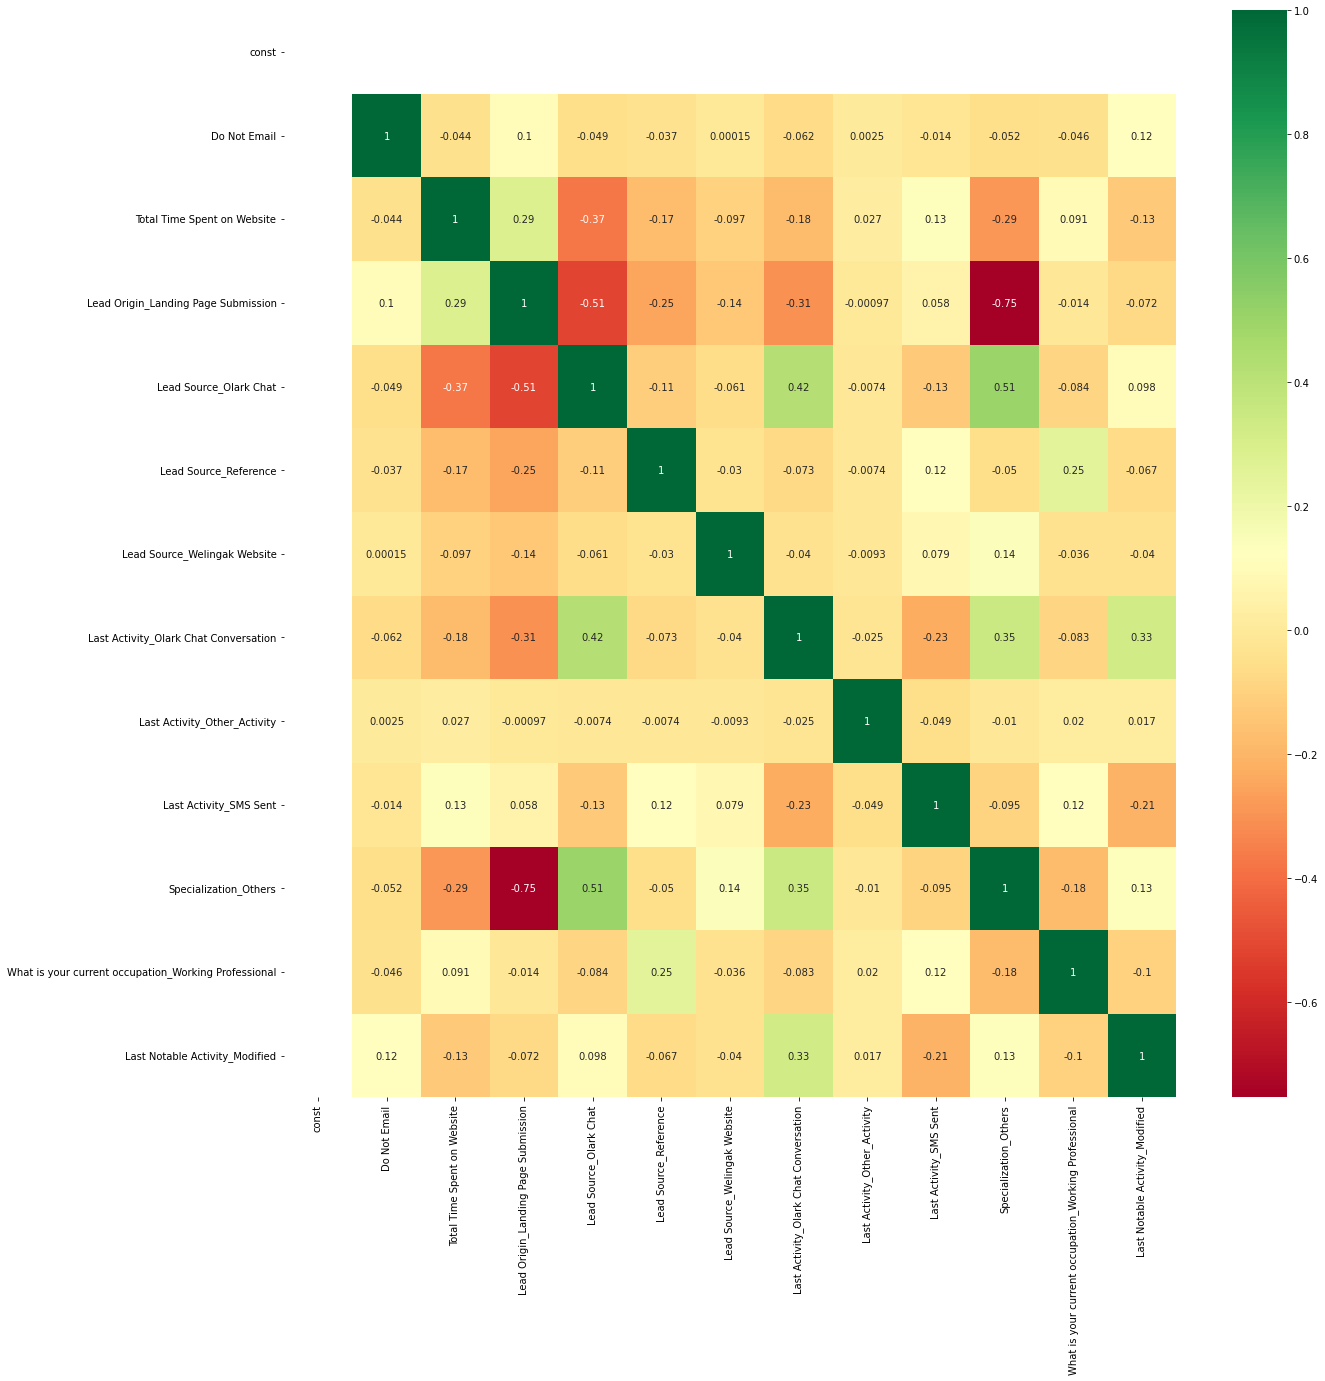

In [130]:
# To check the correlation among varibles
plt.figure(figsize=(20,20))
sns.heatmap(X_train_sm.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [131]:
# Making Prediction on the Train set.

In [132]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [133]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

In [134]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

In [135]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


In [136]:
# Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


In [137]:
# Confusion Matrix
from sklearn import metrics

In [138]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [139]:
# Accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8168792316170682

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Sensitivity
TP / float(TP+FN)

0.7060506950122649

In [142]:
# Specificity
TN / float(TN+FP)

0.8862996158770806

In [143]:
# False postive rate - predicting converted lead when the lead actually was not converted
FP/ float(TN+FP)

0.11370038412291933

In [144]:
# positive predictive value 
TP / float(TP+FP)

0.7954859511745739

In [145]:
# Negative predictive value
TN / float(TN+ FN)

0.8279904306220096

In [146]:
# ROC Curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

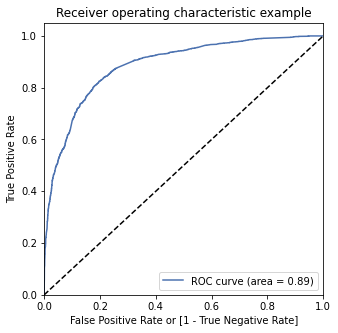

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [149]:
# We have higher area (0.89) under the ROC curve.

In [150]:
# Finding Optimal Cutoff Point

In [151]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


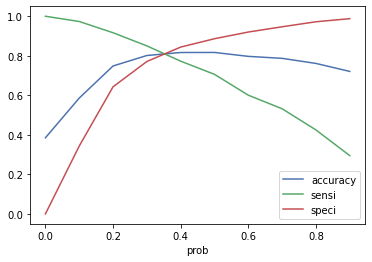

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [154]:
# Taking approximately 0.34 as the optimum point to take as a cut-off probability.

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [156]:
# Assigning Lead Score to Training Data

In [157]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


In [158]:
# Model Evaluation

In [159]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [160]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8172526573998364


In [163]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8069142125480153


In [164]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19308578745198463


In [165]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7261169633127498


In [166]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8757643135075042


In [167]:
# Precision and Recall¶
# Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
# Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [168]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [169]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954859511745739


In [170]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7060506950122649


In [171]:
# Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [172]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7954859511745739


In [173]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7060506950122649


In [174]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [176]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

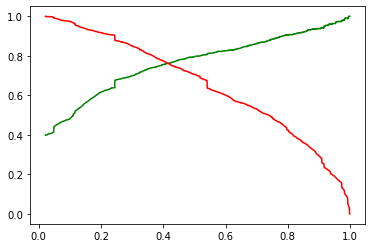

In [177]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [178]:
# The graph shows the trade-off between the Precision and Recall .

In [179]:
# Making predictions on the test set

In [180]:
# Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [181]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [182]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [183]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
y_pred_1.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [186]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [187]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [188]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [189]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [190]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [191]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [193]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [194]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [195]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [196]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [197]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [199]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8050749711649365


In [200]:
# Assigning Lead Score to the Testing data

In [201]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


In [202]:
# Observations:
# After running the model on the Test Data , we obtain:

# Accuracy : 80.4 %
# Sensitivity : 80.4 %
# Specificity : 80.5 %

In [203]:
# Train Data:
    # Accuracy : 81.0 %
    # Sensitivity : 81.7 %
    # Specificity : 80.6 %
    
# Test Data:
    # Accuracy : 80.4 %
    # Sensitivity : 80.4 %
    # Specificity : 80.5 %